# Quelques mots sur l'environnement Python de Kaggle

L'environnement python de Kaggle contient déjà de nombreuses bibliothèques d'analyse utiles :

- Numpy
- Pandas
- Matplotlib
- Seaborn
- Scikit-learn
- SHAP (ajouté ici pour l'explicabilité des modèles, pour remplacer ELI5)

L'environnement est défini par l'image Docker `kaggle/python`. Si vous voulez en savoir plus sur la configuration de l'image cloud sur laquelle vous exécutez votre code, veuillez consulter le repository GitHub.

## Entrée
Il n'y a qu'un seul fichier disponible pour la lecture dans ce notebook, le jeu de données German Credit que nous utiliserons lors de notre session pratique.
Le jeu de données est disponible à `/kaggle/input/german-credit-data-with-risk/german_credit_data.csv`.

## Sauvegarde de données
Vous pouvez écrire jusqu'à **20 Go** dans le répertoire courant kaggle/working qui est conservé entre les sessions. C'est-à-dire que la prochaine fois que vous ouvrez ce notebook et démarrez la session, le fichier sera disponible pour vous.

Vous pouvez également écrire des fichiers temporaires dans /kaggle/temp/, mais ils ne seront pas enregistrés en dehors de la session en cours

Raccourcis utiles
Tous les raccourcis ci-dessous fonctionnent lorsque la cellule cible est sélectionnée (pas lors de l'édition).

- a: pour insérer une cellule au-dessus
- b: pour insérer une cellule en dessous
- dd: pour supprimer une cellule
- m: pour changer la cellule en markdown
- y: pour changer la cellule en code
Pour plus de raccourcis, veuillez consulter ce [notebook](https://www.kaggle.com/naushads/keyboard-shortcuts-for-kaggle-kernels).

# Contexte: German Credit Rapport

Le jeu de données original contient des entrées avec 20 attributs catégoriels/symboliques préparés par le professeur Hofmann. Dans ce jeu de données, chaque entrée représente une personne qui prend un crédit auprès d'une banque. Chaque personne est classée comme un bon ou un mauvais risque de crédit en fonction de l'ensemble des attributs. Le jeu de données original peut être trouvé [here](https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29).

Nous utiliserons une version simplifiée du jeu de données avec seulement **9 attributs** dans notre cours.



In [1]:
### Importation des bibliothèques générales que nous utiliserons dans ce notebook
import os
import numpy as np # algèbre linéaire
import pandas as pd # traitement des données, I/O de fichier CSV (par ex. pd.read_csv)
import seaborn as sns # bibliothèque de tracé qui utilise matplot 
import matplotlib.pyplot as plt # pour tracer certains paramètres dans seaborn

from pymongo import MongoClient

mongo_uri = os.environ.get("MONGO_URI", "mongodb://mongodb:27017/german_credit")
client = MongoClient(mongo_uri)
db = client.get_default_database()
collection = db["reports"]
dataset = pd.DataFrame(list(collection.find({}, {"_id": 0})))

if dataset.empty:
    raise ValueError("La collection MongoDB 'reports' est vide. Lancez le conteneur de seed.")

print(f"Chargé {len(dataset)} documents depuis {db.name}.{collection.name}")

Chargé 1000 documents depuis german_credit.reports


In [2]:
dataset.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [3]:
# Nettoyer le jeu de données
if "Unnamed: 0" in dataset.columns:
    dataset = dataset.drop(columns=["Unnamed: 0"])
dataset.head(n=20)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
5,35,male,1,free,NaN,NaN,9055,36,education,good
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,35,male,3,rent,little,moderate,6948,36,car,good
8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,28,male,3,own,little,moderate,5234,30,car,bad


## Part 1: Exploring the dataset

1. Explore the dataset features and the target variable
 - How much data do we have?
 - Do we have any missing data? (NaN)
 - What are the types of features in our dataset?
 - How is the distribution of the target variable?

Tip: Check out the [Pandas API](https://pandas.pydata.org/) for functions that can help with data exploration.

In [4]:
# Combien de données avons-nous?
print(f'Nous avons {dataset.shape[0]} lignes et {dataset.shape[1]} colonnes.')

# Avons-nous des données manquantes?


# Quels sont les types de caractéristiques (numériques vs catégorielles) ?


# Quelle est la distribution de la variable `Risk`? 


Nous avons 1000 lignes et 10 colonnes.


Ecrivez vos observations de la Partie 1 ici:
- Notre jeu de donées a X lignes et Y colonnes
- [...]

# Partie 2: Analyse de la distribution et de la relation des caractéristiques (attributs)

Dans cette partie de la session pratique, nous allons explorer la relation entre les caractéristiques et leur distribution respective dans le jeu de données.
- Avons-nous un jeu de données biaisé?
- Comment certaines caractéristiques sont-elles liées à un bon/mauvais crédit?

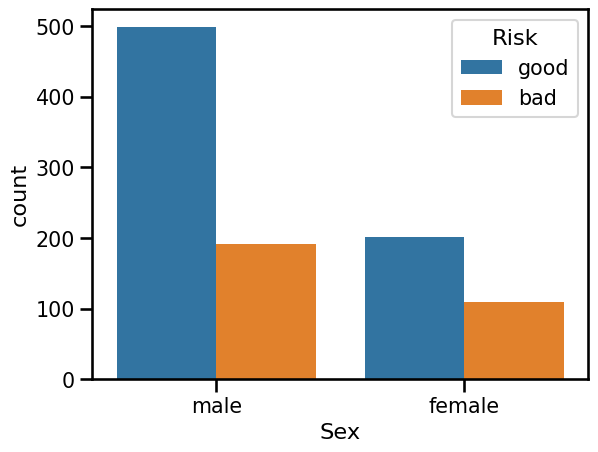

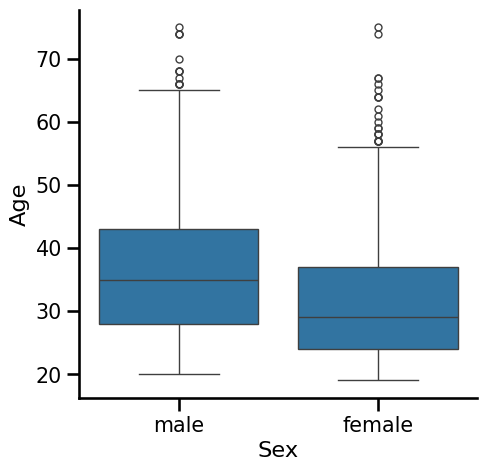

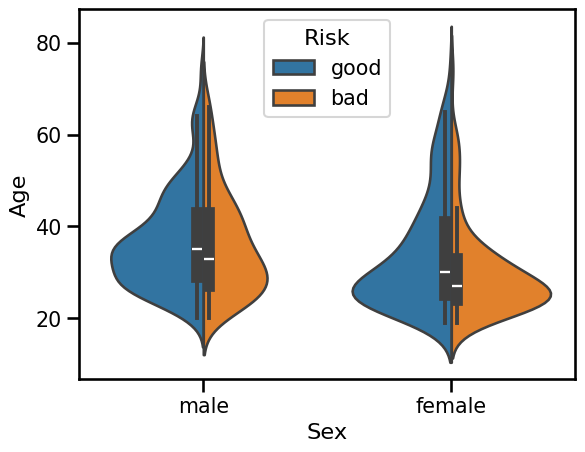

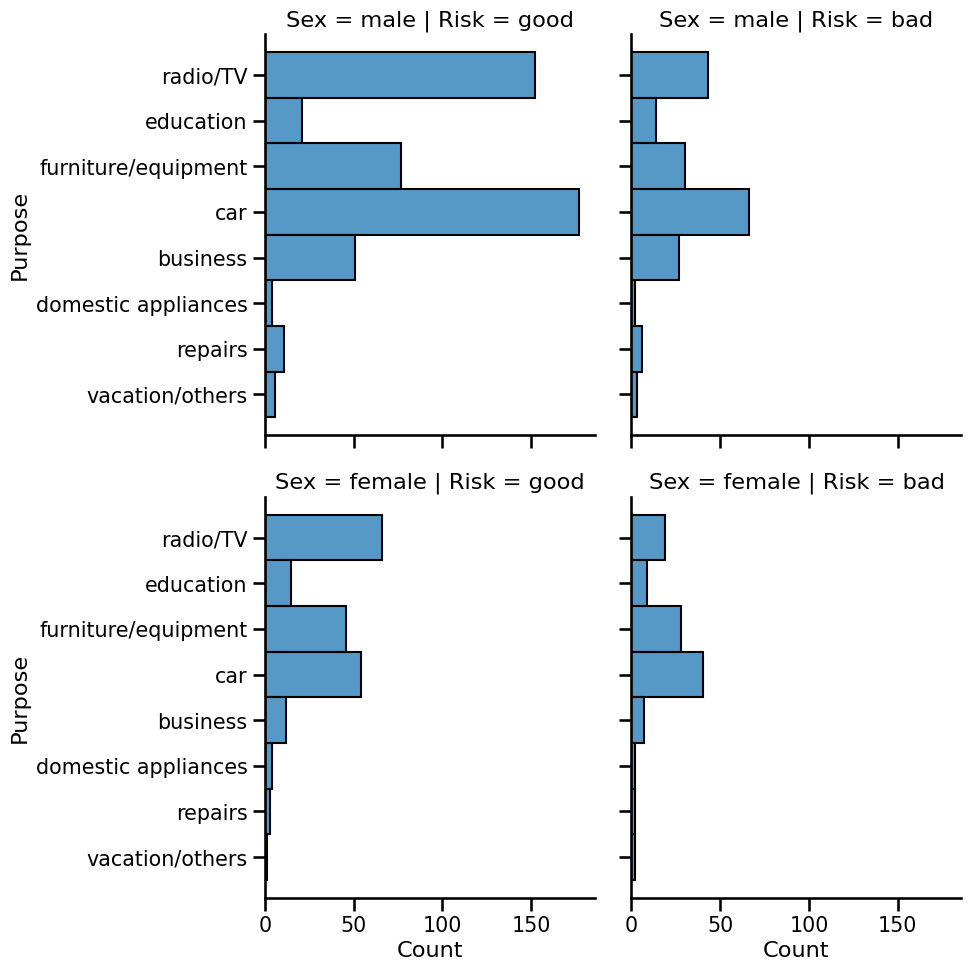

In [5]:
sns.set_context('talk', font_scale=.9)
# Exemple des types d'analyse qui peuvent être effectués

# Count plot nous aide à visualiser le nombre d'éléments par catégorie
sns.countplot(data=dataset, x='Sex', hue='Risk')
plt.show()

# Box plot nous aide à voir la valeur moyenne d'une catégorie "Sex" par "Age" dans notre jeu de données
sns.catplot(data=dataset, x='Sex', y='Age', kind='box')
plt.show()

# Split violin plots nous aide à comparer la distribution à travers une valeur de teinte "Risk"
sns.violinplot(data=dataset, x='Sex', y='Age', hue='Risk', split=True)
plt.show()

# Displot nous aide à visualiser la distribution avec des histogrammes
sns.displot(data=dataset, row='Sex', y='Purpose', col='Risk')
plt.show()

# Expérimentez en analysant d'autres caractéristiques dans le jeu de données!

- Contrôle vs Age vs Risk?
- Compte d'Épargne vs montant de crédit?
- Que demandent les personnes ayant différents types de compte de contrôle (peu, modéré, riche) pour un crédit? 
- ...

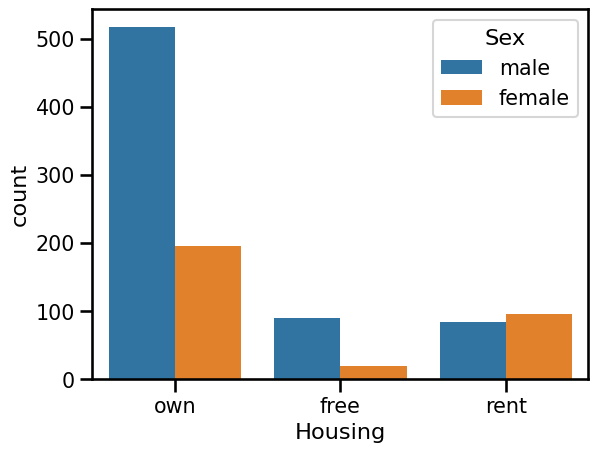

In [6]:
# Ecrivez votre code ici (vous pouvez réutiliser/copier la plupart du code utilisé au dessus 

# Displot nous aide à visualiser la distribution avec des histogrammes
# sns.displot(data=dataset, row='Purpose', y='Credit amount', col='Risk')
# plt.show()

sns.countplot(data=dataset, x='Housing', hue='Sex')
plt.show()

# Partie 3. Préparation du jeu de données pour notre modélisation (Ingénierie des caractéristiques) (Ensemble)

Maintenant que nous avons exploré certaines des caractéristiques de notre jeu de données, nous devrions évaluer leur qualité et leur potentiel pour extraire des caractéristiques plus informatives en appliquant des connaissances du domaine, ou en combinant les caractéristiques ensemble.

- Y a-t-il des caractéristiques qui pourraient être mieux représentées?
- Pouvons-nous extraire d'autres caractéristiques à partir de l'ensemble actuel?

In [7]:
dataset.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


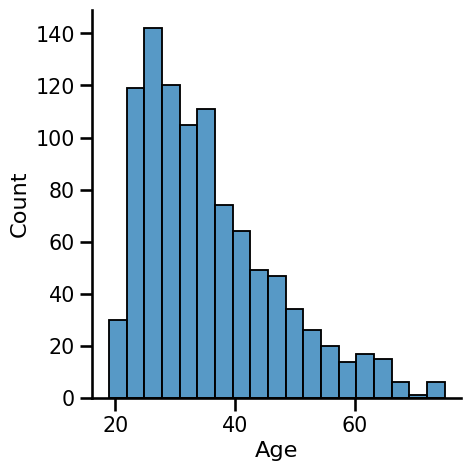

In [8]:
# L'age pourrait-il etre mieux représenté?

# Voyons comment l`age est distribué
sns.displot(dataset['Age'])
plt.show()

# Divisons l'âge en catégories
interval = (18, 25, 35, 60, 120)
cats = ['Young Adult', 'Adult', 'Senior', 'Elder']
dataset["Age_cat"] = pd.cut(dataset['Age'], interval, labels=cats)

In [9]:
dataset.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_cat
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,Elder
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Young Adult
2,49,male,1,own,little,NaN,2096,12,education,good,Senior
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Senior
4,53,male,2,free,little,little,4870,24,car,bad,Senior


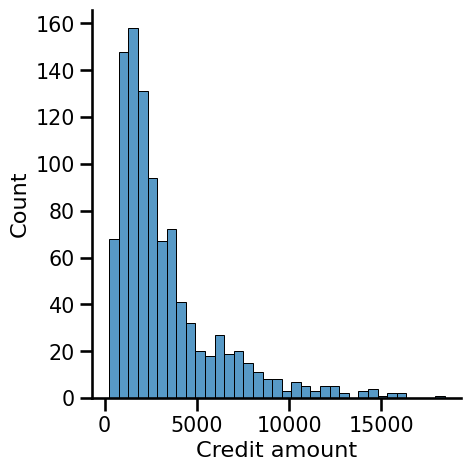

In [10]:
# Le montant du crédit pourrait-il mieux representé?
# Voyons comment le montant du crédit est distribué
sns.displot(dataset['Credit amount'])
plt.show()

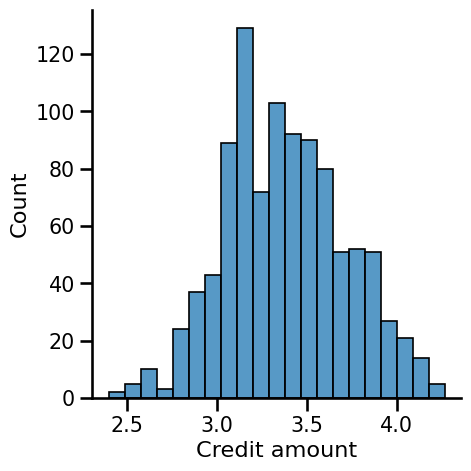

In [11]:
# Une autre façon de représenter les distributions numériques à longue traine est de les transformer
# en utilisant, par exemple, une fonction log
sns.displot(np.log10(dataset['Credit amount']))
plt.show()

# Applique la nouvelle distribution au jeu de données
dataset['Credit amount'] = np.log10(dataset['Credit amount'])

In [12]:
dataset.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_cat
0,67,male,2,own,NaN,little,3.067815,6,radio/TV,good,Elder
1,22,female,2,own,little,moderate,3.774590,48,radio/TV,bad,Young Adult
2,49,male,1,own,little,NaN,3.321391,12,education,good,Senior
3,45,male,2,free,little,little,3.896636,42,furniture/equipment,good,Senior
4,53,male,2,free,little,little,3.687529,24,car,bad,Senior


In [13]:
# Gérer les valeurs manquantes de Compte d'épargne et compte courant
dataset['Saving accounts'] = dataset['Saving accounts'].fillna('no_inf')
dataset['Checking account'] = dataset['Checking account'].fillna('no_inf')

In [14]:
dataset.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_cat
0,67,male,2,own,no_inf,little,3.067815,6,radio/TV,good,Elder
1,22,female,2,own,little,moderate,3.774590,48,radio/TV,bad,Young Adult
2,49,male,1,own,little,no_inf,3.321391,12,education,good,Senior
3,45,male,2,free,little,little,3.896636,42,furniture/equipment,good,Senior
4,53,male,2,free,little,little,3.687529,24,car,bad,Senior


### Encodage des caractéristiques catégorielles

Les caractéristiques catégorielles posent un problème aux modèles d'apprentissage automatique:
- Comment représenter les caractéristiques catégorielles comme Logement = {propriétaire, locataire}?

**Solution 1 - Encodage numérique:** Nous pourrions les représenter en utilisant des valeurs numériques - Logement = {propriétaire = 1, locataire = 2}

| Housing | 
| -- |
| 1 | 
| 2 | 

- Le problème de cette représentation est qu'elle suppose une relation ordonnée:
 - est-ce que "propriétaire" vient avant "locataire"? Cette question a-t-elle même un sens?

**Solution 2 - Encodage One-Hot:** Au lieu de représenter Logement = {propriétaire = 1, locataire = 2}, nous transformons Logement en une matrice:


| Housing_own | Housing_free | 
| -- | -- |
| 1 | 0 | 
| 0 | 1 | 

In [15]:
# Scikit-learn a un encodeur OneHot adéquat que nous pourrions utiliser dans notre pipeline. Cependant,
# pour des raisons d'exploration, l'encodeur OneHot de Scikit-learn ne garde pas trace de la valeur

def one_hot_encoder(df, column_name, exclude_col = False):
    merged_df = df.merge(pd.get_dummies(df[column_name], drop_first=False, prefix=column_name), left_index=True, right_index=True)
    if exclude_col:
        del merged_df[column_name] # Exclure la colonne d'origine
    return merged_df


In [16]:
# Avant d'apliquer l'encodage OneHot
dataset.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk', 'Age_cat'],
      dtype='object')

In [17]:
# Comme le changement va être plus signifiant. On va copier le dataframe et sauvegarder dans une autre variable (on peut toujours comparer le deux)  
dataset_ready = dataset.copy()

category_features = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk', 'Age_cat']

for cat in category_features:
    dataset_ready = one_hot_encoder(dataset_ready, cat, exclude_col=True)

In [18]:
# Avant de l'Encodage OneHot 
dataset_ready.columns

Index(['Age', 'Job', 'Credit amount', 'Duration', 'Sex_female', 'Sex_male',
       'Housing_free', 'Housing_own', 'Housing_rent', 'Saving accounts_little',
       'Saving accounts_moderate', 'Saving accounts_no_inf',
       'Saving accounts_quite rich', 'Saving accounts_rich',
       'Checking account_little', 'Checking account_moderate',
       'Checking account_no_inf', 'Checking account_rich', 'Purpose_business',
       'Purpose_car', 'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others', 'Risk_bad', 'Risk_good',
       'Age_cat_Young Adult', 'Age_cat_Adult', 'Age_cat_Senior',
       'Age_cat_Elder'],
      dtype='object')

In [19]:
dataset_ready.head()

,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,...,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_bad,Risk_good,Age_cat_Young Adult,Age_cat_Adult,Age_cat_Senior,Age_cat_Elder
0,67,2,3.067815,6,False,True,False,True,False,False,...,False,True,False,False,False,True,False,False,False,True
1,22,2,3.774590,48,True,False,False,True,False,True,...,False,True,False,False,True,False,True,False,False,False
2,49,1,3.321391,12,False,True,False,True,False,True,...,False,False,False,False,False,True,False,False,True,False
3,45,2,3.896636,42,False,True,True,False,False,True,...,True,False,False,False,False,True,False,False,True,False
4,53,2,3.687529,24,False,True,True,False,False,True,...,False,False,False,False,True,False,False,False,True,False


# Partie 4. Prédiction du risque (Modelling)

Tout d'abord, nous allons diviser le jeu de données en:
- Caractéristiques (X) et variable cible (y)
- Ensemble d'entraînement (75%) et ensemble de test (25%)

In [20]:
# Importation des bibliothèques que nous utiliserons dans cette partie de la classe
from sklearn.model_selection import train_test_split, KFold, cross_val_score # pour séparer les données
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score #Pour évaluer notre modèle

from sklearn.model_selection import GridSearchCV

# Modèles d'algorithmes à comparer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
# TODO: Ajouter ici tout nouveau modèle que vous souhaitez essayer (ANN, etc.)

# Création des variables X et y
dataset_ready_x = dataset_ready.drop(['Risk_bad', 'Risk_good', 'Age', 'Sex_male'], axis='columns')
X = dataset_ready_x.values
feature_names = dataset_ready_x.columns

y = dataset_ready['Risk_bad'].values

# Séparation de X et y en version d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

ModuleNotFoundError: No module named 'xgboost'

Ensuite, nous expérimenterons avec plusieurs modèles pour choisir quelques-uns appropriés. Voici les modèles que nous allons expérimenter:
- [RandomForestClassifier](https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees)
- [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)
- [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
- [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)
- [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB)
- [Support Vector Machine Classifier (SVC)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)
- [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
- [XGBoost](https://xgboost.readthedocs.io/en/stable/python/python_api.html#module-xgboost.sklearn)
- Plus de classificateurs peuvent être trouvés [ici](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)


In [ ]:
# Expérimentez différents modèles 
classifier = LogisticRegression(solver='liblinear')
# classifier = KNeighborsClassifier()
# classifier = DecisionTreeClassifier()
# classifier = GaussianNB()
# classifier = RandomForestClassifier()
# classifier = SVC()
# classifier = MLPClassifier()
# classifier = XGBClassifier()
# classifier = [...]

classifier_name = classifier.__class__.__name__

scoring_type = 'accuracy'
kfold = KFold(n_splits=5, random_state=42, shuffle=True) # Assurez que toutes les méthodes sont évaluées dans les mêmes données

score = cross_val_score(classifier, X_train, y_train, cv=kfold, scoring=scoring_type)
print(f'Average {scoring_type} performance of the {classifier_name} model = {np.mean(score)}')

# Partie 6a. Évaluation des performances des modèles - Prédiction de l'ensemble de test
Nous avons vu que de nombreux modèles ont une bonne précision dans nos données d'entraînement. **Mais à quel point nos modèles sont-ils réellement bons?**

Regardons à quel point notre modèle prédit les données de test non vues.

In [ ]:
# Test la qualité de la prédiction du modèle 

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Montre le résultat
print(f"Accuracy of our model's prediction {accuracy_score(y_test,y_pred)}")

In [ ]:
# Prevu
print(f'Credit prevu pour le premier 5 utilisateur a le jeu de données {classifier.predict(X_test[0:5])}')

# Actuel
print(f'Actuel données {y_test[0:5]}')

# Part 6b. L'Évaluation de performance du modèle - Configuration des modèles de référence

Exémple de modèles de référence:
- **La plus fréquente** : Comparez avec un modèle qui prévoit toujours un "bon" risque
- **Uniforme** : Comparez avec un modèle qui prévoit 50/50 bon et mauvais risque (jet de pièce)
- **Stratifié** : Comparez avec un modèle qui prévoit 70% de bon et 30% de mauvais (au hasard)

In [ ]:
from sklearn.dummy import DummyClassifier

strategies = ['most_frequent', 'uniform', 'stratified']

for strategy in strategies:

    dummy_clf = DummyClassifier(strategy=strategy)
    dummy_clf.fit(X_train, y_train)

    #Testing the dummy model 
    y_pred = dummy_clf.predict(X_test)

    # Check the obtained results
    print(f'Performance du modèle de référence {strategy}, Accuracy = {accuracy_score(y_test,y_pred)} ')

# Partie 7. Réévaluation des performances des modèles - Exploration d'autres métriques de performance

Essayons d'évaluer notre modèle en utilisant d'autres métriques de performance:
- Précision
- Rappel
- Score F1 (moyenne harmonique entre la précision et le rappel)

In [ ]:
# Testez la qualité de la précision du modéle 
y_pred = classifier.predict(X_test)

# Verifiez les resultats
print(f"""Performance of our choosen model: 
      \t Accuracy = {accuracy_score(y_test, y_pred)} 
      \t Precision = {precision_score(y_test,y_pred)} 
      \t Recall = {recall_score(y_test, y_pred)} 
      \t F1 = {f1_score(y_test, y_pred)}""")

# print(classification_report(y_test, y_pred))
        
strategies = ['most_frequent', 'uniform', 'stratified']

print(f'\nDUMMY Classifiers (Baseline)')
for strategy in strategies:

    dummy_clf = DummyClassifier(strategy=strategy)
    dummy_clf.fit(X_train, y_train)

    # Le modèle de référence
    y_pred_dummy = dummy_clf.predict(X_test)

    # Vérification des résultats
    print(f"""Performance of {strategy} baseline: 
          Accuracy = {accuracy_score(y_test, y_pred_dummy)} 
          Precision = {precision_score(y_test,y_pred_dummy)} 
          Recall = {recall_score(y_test, y_pred_dummy)} 
          F1 = {f1_score(y_test, y_pred_dummy)}""")

In [ ]:
from sklearn.metrics import plo

In [ ]:
# Plot the confusion matrix
plot_confusion_matrix(classifier, X_test, y_test)

# Partie 8. Amélioration du modèle (Optionnel)

In [ ]:
# Configuration des paramètres du modèle
# param_grid = {"penalty": ['none', 'l2', 'l1', 'elasticnet'],
#               "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#               "max_iter": [100, 300]}

# Création du modèle
# model = LogisticRegression()

# grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='f1', verbose=1)
# grid_search.fit(X_train, y_train)

In [ ]:
# print(grid_search.best_score_)
# print(grid_search.best_params_)

In [ ]:
# best_model = LogisticRegression(penalty='none', solver='sag', max_iter=300)

# Faire 
# best_model.fit(X_train, y_train)

# Verifier la qualité da la prédiction du modèle
# y_pred = best_model.predict(X_test)

# Vérification des résultats
# print(f1_score(y_test,y_pred))
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))

# Partie 9. Explication du modèle

## Quelles sont les caractéristiques les plus importantes?

Nous mesurons l'importance d'une caractéristique en calculant l'augmentation de l'erreur de prédiction du modèle après **permutation de la caractéristique** (a.k.a. feature permutation importance). 
- Une caractéristique est "importante" si le mélange de ses valeurs augmente l'erreur du modèle, car dans ce cas le modèle a compté sur la caractéristique pour la prédiction. 
- Une caractéristique est "inimportant" si le mélange de ses valeurs laisse l'erreur du modèle inchangée, car dans ce cas le modèle a ignoré la caractéristique pour la prédiction.

In [ ]:
from sklearn.inspection import permutation_importance

# Permutation importance method (test set)
result = permutation_importance(
    classifier, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.boxplot(
    result.importances[sorted_idx].T, vert=False, labels=feature_names
)
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

In [ ]:
# Permutation importance method (train set)
result = permutation_importance(
    classifier, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.boxplot(
    result.importances[sorted_idx].T, vert=False, labels=feature_names
)
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()

### Exploration de l'effet de chaque caractéristique

Nous allons maintenant utiliser **SHAP (SHapley Additive exPlanations)** pour expliquer le modèle. SHAP fournit:
- Une importance globale des caractéristiques cohérente (basée sur les valeurs de Shapley de la théorie des jeux)
- Des explications locales (pour chaque prédiction)
- Des graphiques riches (bar, beeswarm, waterfall)

Pourquoi SHAP au lieu d'ELI5?
- Fonctionne mieux et de manière unifiée sur de nombreux types de modèles (linéaires, arbres, réseaux, etc.)
- Les valeurs de Shapley satisfont des propriétés d'équité (symétrie, additivité, nullité)
- Donne une interprétation additive: prédiction = valeur de base + somme des contributions

Remarques:
- Pour les modèles linéaires, SHAP ~ coefficients * (feature - expectation)
- Pour les modèles plus complexes (arbres), TreeExplainer optimise le calcul
- Attention aux caractéristiques très corrélées: les valeurs peuvent se répartir entre elles

Nous allons calculer:
1. Un vecteur de valeurs SHAP pour l'ensemble de test
2. Un graphique *beeswarm* (distribution des impacts)
3. Un graphique *bar* (importance moyenne)

Ensuite, nous regarderons une explication locale (waterfall) pour un individu.

In [ ]:
# Remplacement d'ELI5 par SHAP pour l'importance globale des caractéristiques
import numpy as np
import shap
import matplotlib.pyplot as plt

# Initialisation de l'affichage JS (utile si environnement notebook riche)
try:
    shap.initjs()
except Exception:
    pass

# Sélection du bon explainer selon le type de modèle
model_name = classifier.__class__.__name__.lower()
explainer = None
X_train_background = X_train
try:
    if 'forest' in model_name or 'xgb' in model_name or 'gbm' in model_name or 'tree' in model_name:
        # TreeExplainer optimisé pour modèles d'arbres
        explainer = shap.TreeExplainer(classifier)
    elif 'logisticregression' in model_name or 'svc' in model_name or 'mlp' in model_name or 'naive' in model_name:
        # Utiliser un jeu de fond réduit pour KernelExplainer si dimension élevée
        # On échantillonne pour éviter des temps de calcul élevés
        if X_train_background.shape[0] > 200:
            # échantillon aléatoire stable
            rng = np.random.default_rng(42)
            idx = rng.choice(X_train_background.shape[0], 200, replace=False)
            X_train_background = X_train_background[idx]
        explainer = shap.KernelExplainer(classifier.predict_proba, X_train_background)
    else:
        # Fallback générique
        if X_train_background.shape[0] > 200:
            rng = np.random.default_rng(42)
            idx = rng.choice(X_train_background.shape[0], 200, replace=False)
            X_train_background = X_train_background[idx]
        explainer = shap.KernelExplainer(classifier.predict_proba, X_train_background)
except Exception as e:
    print(f"Problème lors de la création de l'explainer SHAP: {e}")
    raise

# Calcul des valeurs SHAP sur un sous-ensemble de test si nécessaire (performance)
X_test_eval = X_test
if X_test.shape[0] > 500:
    X_test_eval = X_test[:500]  # limiter pour vitesse

# Pour les classifieurs probabilistes multi-classes, KernelExplainer renvoie par classe; ici binaire -> prendre classe positive (index 1)
try:
    shap_values = explainer.shap_values(X_test_eval)
except Exception as e:
    print(f"Erreur calcul shap_values: {e}")
    raise

# Gestion du format shap_values (TreeExplainer binaire -> array shape (n_samples, n_features); Kernel -> list)
if isinstance(shap_values, list) and len(shap_values) == 2:
    # prendre la classe positive (supposée index 1)
    shap_values_positive = shap_values[1]
else:
    shap_values_positive = shap_values

feature_list = list(feature_names)

# Graphique beeswarm (distribution + direction)
plt.title('SHAP Beeswarm (impact global des caractéristiques)')
shap.summary_plot(shap_values_positive, X_test_eval, feature_names=feature_list, show=False)
plt.show()

# Graphique barres (importance moyenne absolue)
plt.title('SHAP Importance moyenne absolue')
shap.summary_plot(shap_values_positive, X_test_eval, feature_names=feature_list, plot_type='bar', show=False)
plt.show()

### Exploration de la raison pour laquelle le modèle prédit certaines classes

Maintenant que nous avons exploré les caractéristiques les plus importantes du modèle, nous pouvons également essayer d'expliquer **pourquoi** le modèle prédit certaines classes pour certains enregistrements.


In [ ]:
classifier.predict(X_test[2:3])

In [ ]:
# Explication locale avec SHAP (remplace eli5.show_prediction)
import numpy as np
import shap
import matplotlib.pyplot as plt

# On réutilise l'explainer si déjà défini (sinon on le reconstruit rapidement)
try:
    explainer
except NameError:
    # Fallback minimal (suppose modèle linéaire ou nécessitant KernelExplainer)
    background = X_train[:200] if X_train.shape[0] > 200 else X_train
    explainer = shap.KernelExplainer(classifier.predict_proba, background)

instance_index = 2  # même index que précédemment
x_instance = X_test[instance_index:instance_index+1]
pred_proba = classifier.predict_proba(x_instance)[0][1]
pred_class = classifier.predict(x_instance)[0]
print(f'Prédiction (classe) = {pred_class}, Probabilité classe positive = {pred_proba:.4f}')

# Valeurs SHAP pour une seule instance
try:
    shap_values_instance = explainer.shap_values(x_instance)
except Exception as e:
    print(f'Erreur calcul SHAP local: {e}')
    raise

if isinstance(shap_values_instance, list) and len(shap_values_instance) == 2:
    shap_instance_positive = shap_values_instance[1]
else:
    shap_instance_positive = shap_values_instance

# Waterfall plot (si disponible)
try:
    shap.plots._waterfall.waterfall_legacy(explainer.expected_value[1] if isinstance(explainer.expected_value, (list, np.ndarray)) else explainer.expected_value,
                                         shap_instance_positive[0],
                                         feature_names=list(feature_names),
                                         max_display=20)
except Exception as e:
    print('Waterfall legacy plot indisponible, tentative force plot:', e)
    try:
        shap.force_plot(explainer.expected_value[1] if isinstance(explainer.expected_value, (list, np.ndarray)) else explainer.expected_value,
                        shap_instance_positive[0],
                        matplotlib=True,
                        feature_names=list(feature_names))
    except Exception as e2:
        print('Force plot indisponible:', e2)